In this section, we will explore how we can combine pandas with plotting libraries like matplotlib to render data visualizations. 

Topics covered in this section:
- Use the plot method to render a line chart, 
- Modifying plot aesthetics with matplotlib templates.
- Creating bar graphs to show counts.
- Creating pie charts to represent proportions.

In [2]:
import pandas as pd
pd.__version__

from pandas_datareader import data

import matplotlib.pyplot as plt
# Imports a nested library within the matplotlib package, 

%matplotlib inline
# By default, whenever we combine pandas with matplotlib, the visualizations will be rendered in a separate
# pop-up window. In order to change it so it renders directly beneath the cell, we run the line above which
# registers matplotlib configuration settings with the notebook so that it displays visualizations with the notebook. 

Use the plot method to render a line chart

In [25]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2020-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,44.026669,41.703335,43.086666,42.849998,34739100.0,42.849998
2007-01-04,46.316666,42.423332,42.953335,46.189999,46007700.0,46.189999
2007-01-05,47.306667,45.166668,45.500000,47.099998,41453400.0,47.099998


<AxesSubplot:xlabel='Date'>

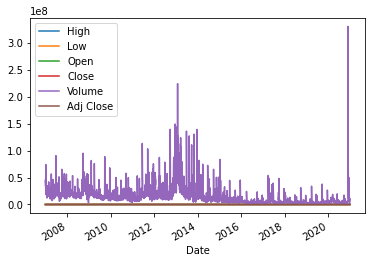

In [5]:
bb.plot()

# Returns a line graph containing line representing different information such as high, low, volume etc. The legend 
# shows us what information is included in the line graph. By default, includes all. 
# However, since volume is significantly greater than the rest, the graph has been adjusted for scale resulting in
# the volume line graph dwarfing line graphs of smaller values. 

<AxesSubplot:xlabel='Date'>

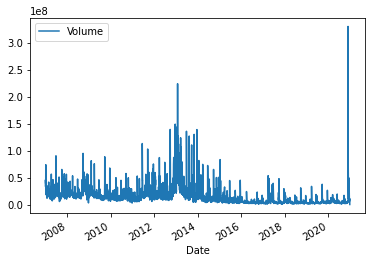

In [7]:
bb.plot(y = "Volume")

# We keep the dates as our x-axis, but we have specified the values to be the volume on the y-axis. 

<AxesSubplot:xlabel='Date'>

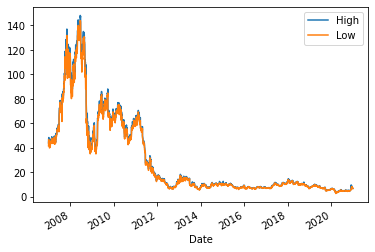

In [9]:
bb.plot(y = ["High", "Low"])

# We can provide a list of y-axis values to include. 

<AxesSubplot:title={'center':'Volume of BB Stocks'}, xlabel='Date'>

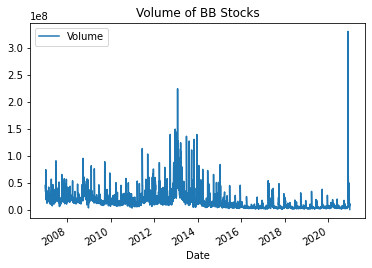

In [12]:
# Plotting specific columns by extracting a subset of columns from the original DataFrame. 

# When dealing with a single column (say Volume), we can provide the desired column to the y parameter in the
# plot method on the Dataframe, as we have done above.

# An alternative is to extract that specific column as a series and plot that series instead. 

bb["Volume"].plot(legend = True, title = "Volume of BB Stocks")

<AxesSubplot:title={'center':'High and Low of BB Stock'}, xlabel='Date'>

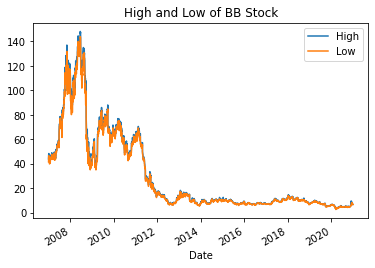

In [14]:
# For multiple columns, we can extract a subset of the original DataFrame by providing a list of columns. 

bb[["High", "Low"]].plot(legend = True, title = "High and Low of BB Stock")

Modifying plot aesthetics with matplotlib templates

In this section, we will explore how to customize the look and feel of our plots with built-in matplotlib templates. 

In [15]:
bb = data.DataReader(name = "bb", data_source = "yahoo", start = "2010-01-01", end = "2020-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,68.230003,65.639999,68.160004,65.930000,20035800,65.930000
2010-01-05,67.169998,64.930000,66.959999,65.800003,22082200,65.800003
2010-01-06,65.809998,64.400002,65.730003,65.400002,16697900,65.400002


In [16]:
# The matplotlib library has a nested package caled pyplot (which we imported at the beginning of this notebook) 
# with the alias plt. Within this package, we want to access another nested package (folder) called style. And within
# style, we want to access an attribute called available. 

plt.style.available # pyplot > style > available. 

# Returns a list of strings, each representing a template or a theme. These are predefined (preconfigured) colors. 
# Next, by applying one of the themes, every time we use the plot method on our DataFrame, that style will 
# automatically be applied. 

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

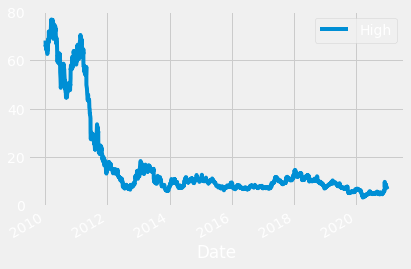

In [22]:
plt.style.use('fivethirtyeight') # Changed the style and will be automatically applied to future plots. 
bb.plot(y = "High")

<AxesSubplot:xlabel='Date'>

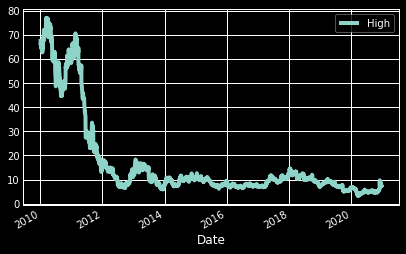

In [21]:
plt.style.use('dark_background') # Changed the style and will be automatically applied to future plots. 
bb.plot(y = "High")

<AxesSubplot:xlabel='Date'>

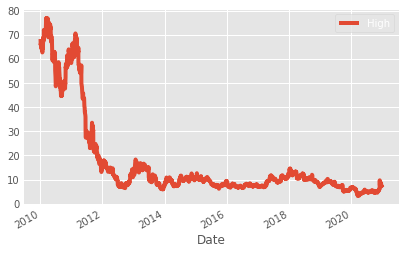

In [20]:
plt.style.use("ggplot")
bb.plot(y = "High")

In [23]:
# matplotlib allows us to customize each aspect of the graph (e.g. color, y-axis, background etc) separately, 
# however, changing styles is useful if you just want to use a predefined theme. 

Creating bar graphs to show counts

Bar graphs are ideal if you want to show counts for certain categories. 

In [27]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2010-01-01", end = "2020-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,68.230003,65.639999,68.160004,65.930000,20035800,65.930000
2010-01-05,67.169998,64.930000,66.959999,65.800003,22082200,65.800003
2010-01-06,65.809998,64.400002,65.730003,65.400002,16697900,65.400002


In [28]:
# Categorize each one of the stock performances by giving three different categories - poor, satisfactory and
# stellar based on the price of the stock,

# Invoke a function and pass in each value that we have in the series so that we can return a corresponding string,
# either poor, satisfactory or stellar.

# Step 1. Define a function for ranking performance,
def rank_performance(stock_price):
    if stock_price <= 10:
        return "Poor"
    elif stock_price <= 50:
        return "Satisfactory"
    else: 
        return "Stellar"
    
# Step 2. Pass in each value of the series to the function by using the .apply() method. 
bb["Close"].apply(rank_performance)
# Returns a brand new series with one of the categories assigned to each date depending on the closing stock
# price of that date according to the criteria set in our function. 

Date
2010-01-04    Stellar
2010-01-05    Stellar
2010-01-06    Stellar
2010-01-07    Stellar
2010-01-08    Stellar
               ...   
2020-12-23       Poor
2020-12-24       Poor
2020-12-28       Poor
2020-12-29       Poor
2020-12-30       Poor
Name: Close, Length: 2768, dtype: object

In [29]:
# However, this is not great for plotting a bar graph because we need a count of the values. 
# value_counts() method : counts the occurrence of values (in our case, the individual categories) in our series. 

bb["Close"].apply(rank_performance).value_counts()
# For a series like this, where the index labels are some kind of categories and the values are how many times they
# occur, a bar graph is a good choice for visualization.  

Poor            1540
Satisfactory     945
Stellar          283
Name: Close, dtype: int64

<AxesSubplot:>

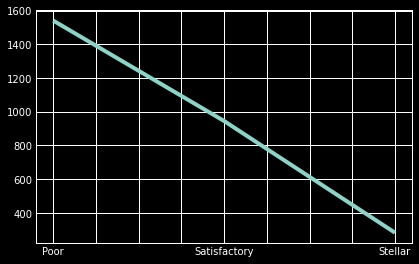

In [90]:
# Plotting
plt.style.use("dark_background")

bb["Close"].apply(rank_performance).value_counts().plot()
# The standard plot() method will plot a line graph.

<AxesSubplot:>

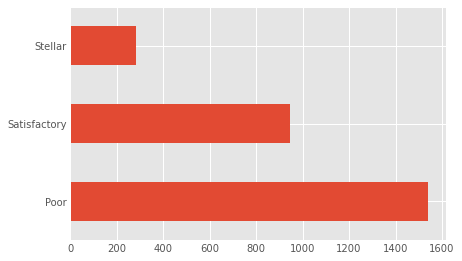

In [42]:
# bb["Close"].apply(rank_performance).value_counts().plot(kind = "bar")
# We need to input the parameter "kind" to specify the type of graph to be plotted. 


bb["Close"].apply(rank_performance).value_counts().plot(kind = "barh")
# kind = "barh"  : bar horizontal graph flips around the axes. 

Creating pie charts to represent proportions

Pie charts are used to show ratio, how much we have of something relative of something else. 

In [43]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2010-01-01", end = "2020-12-31")
bb.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,68.230003,65.639999,68.160004,65.930000,20035800,65.930000
2010-01-05,67.169998,64.930000,66.959999,65.800003,22082200,65.800003
2010-01-06,65.809998,64.400002,65.730003,65.400002,16697900,65.400002


In [95]:
# Find out how many of our stocks performance days are below average and how many come in above average.

# Steps:
# Step 1. Find the average stock price.
# Step 2. Define function to classify whether stock performance is above or below the average stock price.
# Step 3. Apply function (using .apply() method) to return series with a category assigned to each date. 
# Step 4. value_counts() method to return the count of each category in our series. Showing how many days fall 
# above or below the average stocks price. 
# Step 5. Plot the counts of each category in a pie chart. 
####

bb_avg = bb["Close"].mean() # Returns the average stock price. 

# Define function to determine whether the stock price is above or below average. 
def ab_avg(stock_price): 
    if stock_price >= bb_avg:
        return "Above Average"
    else: 
        return "Below Average"

<AxesSubplot:ylabel='Close'>

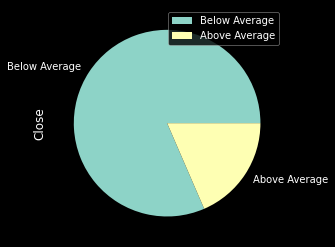

In [98]:
# Plots the count of each category using pie chart. 
# plt.style.use["dark_background"]  ???? not working ?????

bb["Close"].apply(ab_avg).value_counts().plot(kind = "pie", legend = True)

# We can see that there are significantly more below average days compared to above average days. This tells us
# that on some above average days, the stock price is so high it drags up the average. 